In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
from mpl_toolkits.mplot3d import Axes3D
import xarray as xr

def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    print(base)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

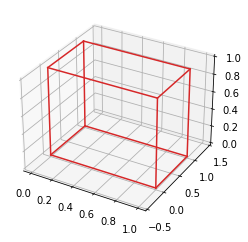

In [3]:
def plot_box(ax, x,y,z, alpha=1.):
    
    kwargs = {"linestyle": "-", "color":"C3", "alpha":alpha}
    
    plt.plot([x[0], x[1]], [y[0], y[0]], [z[0], z[0]], **kwargs)
    plt.plot([x[0], x[1]], [y[0], y[0]], [z[1], z[1]], **kwargs)
    plt.plot([x[0], x[1]], [y[1], y[1]], [z[0], z[0]], **kwargs)
    plt.plot([x[0], x[1]], [y[1], y[1]], [z[1], z[1]], **kwargs)
    
    plt.plot([x[0], x[0]], [y[0], y[1]], [z[0], z[0]], **kwargs)
    plt.plot([x[0], x[0]], [y[0], y[1]], [z[1], z[1]], **kwargs)
    plt.plot([x[1], x[1]], [y[0], y[1]], [z[0], z[0]], **kwargs)
    plt.plot([x[1], x[1]], [y[0], y[1]], [z[1], z[1]], **kwargs)
    
    plt.plot([x[0], x[0]], [y[0], y[0]], [z[0], z[1]], **kwargs)
    plt.plot([x[0], x[0]], [y[1], y[1]], [z[0], z[1]], **kwargs)
    plt.plot([x[1], x[1]], [y[0], y[0]], [z[0], z[1]], **kwargs)
    plt.plot([x[1], x[1]], [y[1], y[1]], [z[0], z[1]], **kwargs)
    
ax = plt.subplot(projection="3d")
plot_box(ax, [0,1], [0,1], [0,1], alpha=1.)
plt.ylim(-0.5, 1.5)
plt.show()

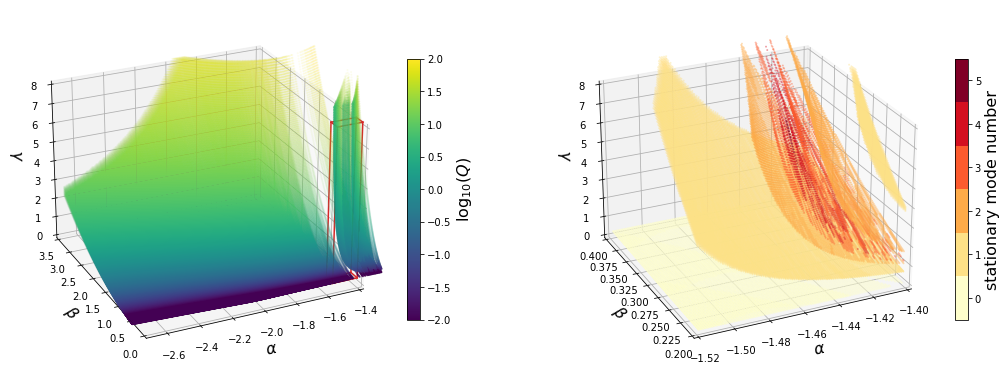

In [6]:
fig = plt.figure(figsize=(18,8))

## Zoomed out

ds = xr.open_dataset("../data/critical_3d_log.nc")

tol = 0.2
c = ds["match"] < tol
ds["controlled"] = c.astype(np.float64)
ds["controlled"] = ds["controlled"].where(ds["controlled"]==1)

α = np.tile(ds["α"].values[:, np.newaxis, np.newaxis], (1, 400, 400))
β = np.tile(ds["β"].values[np.newaxis, :, np.newaxis], (400, 1, 400))
γ = np.tile(ds["γ"].values[np.newaxis, np.newaxis, :], (400, 400, 1))

ax = plt.subplot(1,2,1, projection='3d')

plot_box(ax, [-1.52,-1.36], [0.2, 0.4], [0,8])

sc = ax.scatter(xs=α[c].flatten(),ys=β[c].flatten(),zs=γ[c].flatten(),
           s=15,c=np.log10(ds["Q"].values[c].flatten()),
           cmap=plt.get_cmap("viridis"),vmin=-2,vmax=2,
           marker='.',linewidth=0,alpha=0.075)
sc = ax.scatter(xs=[],ys=[],zs=[],
           s=15,c=[],
           cmap=plt.get_cmap("viridis"),vmin=-2,vmax=2,
           marker='.',linewidth=0,alpha=1.)
cb = fig.colorbar(sc,shrink=0.6)
cb.set_label(r"$\log_{10}(Q)$",fontsize=16)

ax.set_xlabel(r'$\alpha$',fontsize=16)
ax.set_ylabel(r'$\beta$',fontsize=16)
ax.set_zlabel(r'$\gamma$',fontsize=16)

ax.set_zlim(0, 8)
ax.set_ylim(0, 3.5)
ax.set_xlim(-2.7, -1.4)

ax.view_init(25, -115)

# Zoomed in
ds = xr.open_dataset("../data/critical_3d_zoom_log.nc")
c = ds["match"] < tol
ds["controlled"] = c.astype(np.float64)
ds["controlled"] = ds["controlled"].where(ds["controlled"]==1)

α = np.tile(ds["α"].values[:, np.newaxis, np.newaxis], (1, 400, 400))
β = np.tile(ds["β"].values[np.newaxis, :, np.newaxis], (400, 1, 400))
γ = np.tile(ds["γ"].values[np.newaxis, np.newaxis, :], (400, 400, 1))

c = c & (α>-1.52) & (α<-1.36) & (β > 0.2) & (β < 0.4)

ax = plt.subplot(1,2,2, projection='3d')
sc = ax.scatter(xs=α[c].flatten(),ys=β[c].flatten(),zs=γ[c].flatten(),
           s=15,c=ds["mode"].values[c].flatten(),
           cmap=discrete_cmap(6,'YlOrRd'),vmin=-0.5,vmax=5.5,
           marker='.',linewidth=0,alpha=0.4)
sc = ax.scatter(xs=[],ys=[],zs=[],
           s=15,c=[],
           cmap=discrete_cmap(6,'YlOrRd'),vmin=-0.5,vmax=5.5,
           marker='.',linewidth=0,alpha=1.)
cb = fig.colorbar(sc,shrink=0.6)
cb.set_label("stationary mode number",fontsize=16)

ax.set_xlabel(r'$\alpha$',fontsize=16)
ax.set_ylabel(r'$\beta$',fontsize=16)
ax.set_zlabel(r'$\gamma$',fontsize=16)

ax.set_zlim(0, 8)
ax.set_ylim(0.2, 0.4)
ax.set_xlim(-1.52, -1.4)

ax.view_init(25, -115)

plt.savefig('../figures/3d_control_surface.png',bbox_inches='tight',dpi=250)